<a href="https://colab.research.google.com/github/farastu-who/GIS-DL/blob/main/GIS_DL_TL_IC_SS50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an example of Image Classification using a simple Neural Network on Satellite Images.

GIS-DL-TL-IC-SS50 : Geographic Information System - Deep Learning - Transmission Lines - Image Classification - Sample Size 50

In [1]:
# Install required packages (if not already installed)
!pip install tensorflow
!pip install opencv-python
!pip install tf_slim
!pip install keras

In [2]:
# Mount Google Drive (if using files from Google Drive)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#import the relevant libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [4]:
# Set paths and parameters
data_dir = '/content/gdrive/My Drive/custom_dataset_50'
batch_size = 10 # number of data samples in each batch
input_shape = (256, 256, 3)
num_classes = 2  # Transmission Line and None


In [5]:
# Load and preprocess the dataset
def load_dataset(data_dir):
    X, y = [], []
    classes = ['none', 'transmission_line']
    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, input_shape[:2])
            img = img.astype("float32") / 255.0
            X.append(img)
            if class_idx == 0:
                y.append(0)  # Encode 'none' as 0
            else:
                y.append(1)  # Encode 'transmission_line' as 1
    return np.array(X), np.array(y)

# Load and preprocess the dataset
X, y = load_dataset(data_dir)

# Count the number of samples for each class
num_none = np.sum(y == 0)
num_transmission_line = np.sum(y == 1)

# Print the number of samples for each class
print("Number of 'None' samples:", num_none)
print("Number of 'Transmission Line' samples:", num_transmission_line)

Number of 'None' samples: 100
Number of 'Transmission Line' samples: 50


In [6]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Create data generators for data augmentation
train_datagen = ImageDataGenerator(
    # rotation_range=20,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest',
    rescale=1.0 / 255.0
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create a generator for training data
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

# Create a generator for validation data
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [7]:
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # dropout for regularization
    Dense(128, activation='relu'),
    Dropout(0.5),  # dropout for regularization
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
epochs = 10
# Train the model and store the history in a variable
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/10
4/4 [==============================] - 14s 794ms/step - loss: 1.4397 - accuracy: 0.4857 - val_loss: 0.6507 - val_accuracy: 0.7273
Epoch 2/10
4/4 [==============================] - 0s 107ms/step - loss: 0.6661 - accuracy: 0.6095 - val_loss: 0.5517 - val_accuracy: 0.7273
Epoch 3/10
4/4 [==============================] - 0s 94ms/step - loss: 0.8241 - accuracy: 0.6381 - val_loss: 0.6642 - val_accuracy: 0.7273
Epoch 4/10
4/4 [==============================] - 0s 95ms/step - loss: 0.6723 - accuracy: 0.5714 - val_loss: 0.6497 - val_accuracy: 0.7273
Epoch 5/10
4/4 [==============================] - 0s 96ms/step - loss: 0.6712 - accuracy: 0.6381 - val_loss: 0.5877 - val_accuracy: 0.7273
Epoch 6/10
4/4 [==============================] - 0s 91ms/step - loss: 0.6578 - accuracy: 0.6000 - val_loss: 0.6443 - val_accuracy: 0.7273
Epoch 7/10
4/4 [==============================] - 0s 105ms/step - loss: 0.6611 - accuracy: 0.6381 - val_loss: 0.6175 - val_accuracy: 0.7273
Epoch 8/10
4/4 [=======

In [9]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

1/1 [==============================] - 1s 894ms/step - loss: 0.5919 - accuracy: 0.6957
Test accuracy: 0.6957


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


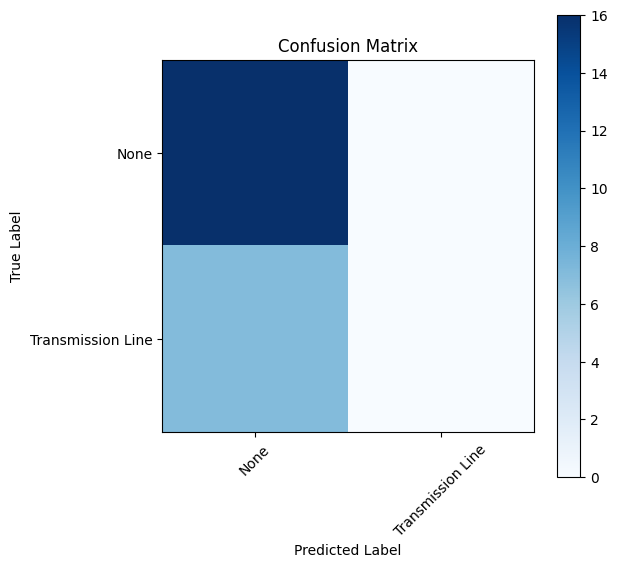

Classification Report:
                   precision    recall  f1-score   support

             None       0.70      1.00      0.82        16
Transmission Line       0.00      0.00      0.00         7

         accuracy                           0.70        23
        macro avg       0.35      0.50      0.41        23
     weighted avg       0.48      0.70      0.57        23



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Predict class labels for the test set
y_pred = model.predict_classes(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['None', 'Transmission Line'], rotation=45)
plt.yticks(tick_marks, ['None', 'Transmission Line'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
target_names = ['None', 'Transmission Line']
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

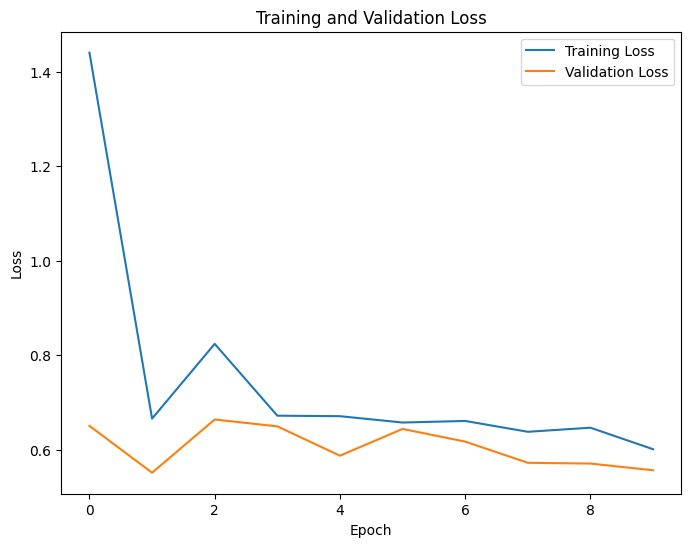

In [11]:
# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


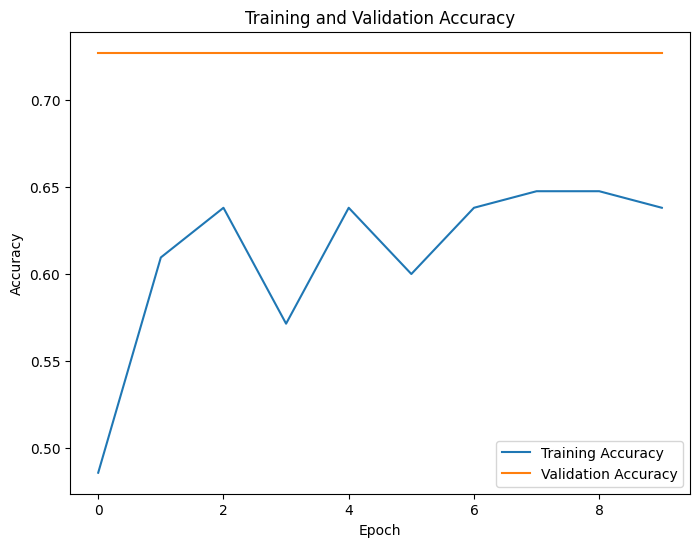

In [12]:
# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()